## Импорт зависимостей

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Вспомогательные функции

In [8]:
def get_hex(number: float | int):
    if type(number) == int:
        return f'{number:x}'
    point_position: int = str(number).find(".")
    return f'{int(str(number)[0:point_position]):x}.{int(str(number)[point_position + 1:]):x}'

## Инициализация целевой функции

In [24]:
# Определение целевой функции
class TargetFunction:
    def __init__(self, name: str, middle_name: str, surname: str):
        self.a_1: float = len(name) / 10
        self.a_2: float = len(middle_name) / 10
        self.a_3: float = len(surname) / 10
        self.A: float = len(name) + len(middle_name) + len(surname)
        self.calculations_count: int = 0
        self.derivative_calculations_count: int = 0
        self.second_derivative_calculations_count: int = 0
        
    def calculate(self, x: float) -> float:
        self.calculations_count += 1
        return np.exp(self.a_1 * x) + np.exp(self.a_2 * x) + np.exp(self.a_3 * x) - self.A * np.sin(x)

    def get_calculations_count(self) -> int:
        return self.calculations_count

    def flush_calculations_count(self) -> str:
        self.calculations_count = 0
        return 'Calculations count flush - Success'

    def calculate_derivative(self, x):
        self.derivative_calculations_count += 1
        return self.a_1 * np.exp(self.a_1 * x) + self.a_2 * np.exp(self.a_2 * x) + self.a_3 * np.exp(self.a_3 * x) - self.A * np.cos(x)

    def get_derivative_calculations_count(self) -> int:
        return self.derivative_calculations_count

    def flush_derivative_calculations_count(self) -> str:
        self.derivative_calculations_count = 0
        return 'Derivative calculations count flush - Success'

    def calculate_second_derivative(self, x):
        self.second_derivative_calculations_count += 1
        return self.a_1 * self.a_1 * np.exp(self.a_1 * x) + self.a_2 * self.a_2 * np.exp(self.a_2 * x) + self.a_3 * self.a_3 * np.exp(self.a_3 * x) + self.A * np.sin(x)

    def get_second_derivative_calculations_count(self) -> int:
        return self.second_derivative_calculations_count

    def flush_second_derivative_calculations_count(self) -> str:
        self.second_derivative_calculations_count = 0
        return 'Second derivative calculations count flush - Success'

In [28]:
class NewTargetFunction(TargetFunction):
    def __init__(self):
        self.calculations_count: int = 0
        self.derivative_calculations_count: int = 0
        self.second_derivative_calculations_count: int = 0

    def calculate(self, x: float) -> float:
        self.calculations_count += 1
        return np.tan(x) - 2 * np.sin(x)

In [29]:
# Создаем экземпляр функции
# my_func: TargetFunction = TargetFunction(name='Григорий', middle_name='Григорьевич', surname='Мацнев')
my_func: NewTargetFunction = NewTargetFunction()

## Построение графика целевой функции

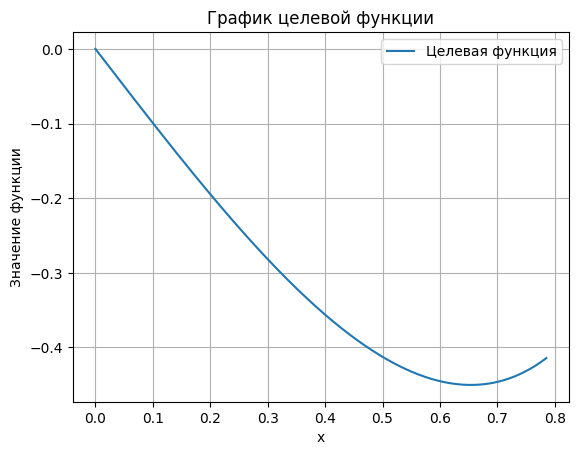

In [31]:
# Создаем массив значений x для отображения графика
x_plot_values = np.linspace(0, np.pi / 4, 1000)
y_plot_values = [my_func.calculate(x) for x in x_plot_values]

# Отображаем график
plt.plot(x_plot_values, y_plot_values, label='Целевая функция')
plt.xlabel('x')
plt.ylabel('Значение функции')
plt.title('График целевой функции')
plt.legend()
plt.grid(True)

# Выводим график на экран
plt.show()

## Поиск экстремума методом пассивного поиска

In [32]:
def passive_search(func: TargetFunction, a: int, b: int, precision: float = 0.001, history: pd.DataFrame = pd.DataFrame(columns=['x_1', 'x_2', 'f(x_1)', 'f(x_2)', 'Вычисления f(x)'])) -> (float, float, pd.DataFrame):
    # Инициализируем начальные значения
    num_points: int = int((b - a) / precision + 1)
    step: float = (b - a) / num_points
    x_1, x_2 = a, a + step
    y_1, y_2 = func.calculate(x_1), func.calculate(x_2)
    history.loc[len(history)] = (x_1, x_2, y_1, y_2, func.get_calculations_count())

    # Проходим по сетке точек и ищем две точки, где функция меняет свое значение с убывания на возрастание
    while x_2 < b:
        if y_1 < y_2:
            return np.round(x_1, len(str(precision))), np.round(y_1, len(str(precision))), history
        else:
            x_1, y_1 = x_2, y_2
            x_2 = x_1 + step
            y_2 = func.calculate(x_2)
            history.loc[len(history)] = (x_1, x_2, y_1, y_2, func.get_calculations_count())
        
    # Если не нашли минимум - вернуть крайнюю точку b
    return np.round(x_2, len(str(precision))), np.round(y_2, len(str(precision))), history

In [33]:
my_func.flush_calculations_count()

'Calculations count flush - Success'

In [34]:
min_x, min_value, minimizer_history = passive_search(my_func, 0, np.pi / 4, 0.03)

print(f'(Точка минимума, Минимальное значение) : ({min_x}, {min_value}) \n Количество вычислений целевой функции : {my_func.get_calculations_count()}')

_: str = my_func.flush_calculations_count()

minimizer_history

(Точка минимума, Минимальное значение) : (0.64, -0.4498) 
 Количество вычислений целевой функции : 24


,x_1,x_2,f(x_1),f(x_2),Вычисления f(x)
0,0.000000,0.029089,0.000000,-0.029072,2.0
1,0.029089,0.058178,-0.029072,-0.058046,3.0
2,0.058178,0.087266,-0.058046,-0.086823,4.0
3,0.087266,0.116355,-0.086823,-0.115303,5.0
4,0.116355,0.145444,-0.115303,-0.143385,6.0
5,0.145444,0.174533,-0.143385,-0.170969,7.0
6,0.174533,0.203622,-0.170969,-0.197952,8.0
7,0.203622,0.232711,-0.197952,-0.224227,9.0
8,0.232711,0.261799,-0.224227,-0.249689,10.0
9,0.261799,0.290888,-0.249689,-0.274226,11.0


## Поиск экстремума методом дихотомии

In [25]:
def boolean_search(func: TargetFunction, a: int, b: int, delta: float = 0.0001, precision: float = 0.001, max_iterations: int = 1000, history: pd.DataFrame = pd.DataFrame(columns=['a', 'b', 'x_1', 'x_2', 'f(x_1)', 'f(x_2)', 'b - a', 'Вычисления f(x)'])) -> (float, float, pd.DataFrame):
    # Инициализируем начальные значения
    sub_delta: float = delta / 2
    iterations: int = 0
    middle_point: float = 0

    # Выполняем деление, пока не достигнем нужной точности
    while b - a > precision and iterations < max_iterations:
        middle_point: float = (a + b) / 2
        x_1: float = middle_point - sub_delta
        x_2: float = middle_point + sub_delta
        y_1: float = func.calculate(x_1)
        y_2: float = func.calculate(x_2)
        # Сравниваем значения функции на левой и правой стороне середины
        if y_1 < y_2:
            # Если значение справа больше центра, двигаем правую границу
            b: float = x_2
        else:
            # Иначе двигаем левую границу
            a: float = x_1
        # Увеличиваем счётчик итераций
        iterations += 1
        history.loc[len(history)] = (a, b, x_1, x_2, y_1, y_2, f'{(b - a):5e}', func.get_calculations_count())

    # Возвращаем полученные значения
    return np.round(middle_point, len(str(precision)) - 2), np.round(func.calculate(middle_point), len(str(precision)) - 2), history

In [26]:
min_x, min_value, minimizer_history = boolean_search(my_func, 0, 10)

print(f'(Точка минимума, Минимальное значение) : ({min_x}, {min_value}) \n Количество вычислений целевой функции : {my_func.get_calculations_count()}')

_: str = my_func.flush_calculations_count()

minimizer_history

(Точка минимума, Минимальное значение) : (1.253, -14.934) 
 Количество вычислений целевой функции : 29


,a,b,x_1,x_2,f(x_1),f(x_2),b - a,Вычисления f(x)
0,0.000000,5.000050,4.999950,5.000050,343.332837,343.364616,5.000050e+00,2
1,0.000000,2.500075,2.499975,2.500075,12.550428,12.555011,2.500075e+00,4
2,1.249987,2.500075,1.249987,1.250088,-14.934256,-14.934264,1.250088e+00,6
3,1.249987,1.875081,1.874981,1.875081,-8.425034,-8.422876,6.250938e-01,8
4,1.249987,1.562584,1.562484,1.562584,-13.377815,-13.376790,3.125969e-01,10
5,1.249987,1.406336,1.406236,1.406336,-14.560332,-14.559839,1.563484e-01,12
6,1.249987,1.328212,1.328112,1.328212,-14.845329,-14.845091,7.822422e-02,14
7,1.249987,1.289150,1.289050,1.289150,-14.913888,-14.913774,3.916211e-02,16
8,1.249987,1.269619,1.269519,1.269619,-14.930042,-14.929990,1.963105e-02,18
9,1.249987,1.259853,1.259753,1.259853,-14.933634,-14.933613,9.865527e-03,20


## Поиск экстремума методом золотого сечения

In [27]:
def golden_cut(func: TargetFunction, a: int, b: int, precision: float = 0.001, max_iterations: int = 1000, history: pd.DataFrame = pd.DataFrame(columns=['a', 'b', 'x_1', 'x_2', 'f(x_1)', 'f(x_2)', 'b - a', 'Вычисления f(x)'])) -> (float, float, pd.DataFrame):
    # Инициализируем начальные значения
    phi: float = (1 + np.sqrt(5)) / 2
    step: float = (b - a) / phi
    x_1: float = b - step
    x_2: float = a + step
    y_1: float = func.calculate(x_1)
    y_2: float = func.calculate(x_2)
    iterations: int = 0
    history.loc[len(history)] = (a, b, x_1, x_2, y_1, y_2, f'{(b - a):5e}', func.get_calculations_count())

    # Выполняем деление, пока не достигнем нужной точности
    while b - a > precision and iterations < max_iterations:
        if y_1 >= y_2:
            # Если значение слева больше, двигаем левую границу
            a: float = x_1
            x_1: float = x_2
            x_2: float = b - x_1 + a
            y_1 = y_2
            y_2 = func.calculate(x_2)
        else:
            # Иначе двигаем правую границу
            b: float = x_2
            x_2: float = x_1
            x_1: float = a + b - x_2
            y_2 = y_1
            y_1 = func.calculate(x_1)
        # Увеличиваем счётчик итераций
        iterations += 1
        history.loc[len(history)] = (a, b, x_1, x_2, y_1, y_2, f'{(b - a):5e}', func.get_calculations_count())
        

    # Возвращаем полученные значения
    return np.round((a + b) / 2, len(str(precision)) - 2), np.round(func.calculate((a + b) / 2), len(str(precision)) - 2), history

In [28]:
min_x, min_value, minimizer_history = golden_cut(my_func, 0, 10)

print(f'(Точка минимума, Минимальное значение) : ({min_x}, {min_value}) \n Количество вычислений целевой функции : {my_func.get_calculations_count()}')

_: str = my_func.flush_calculations_count()

minimizer_history

(Точка минимума, Минимальное значение) : (1.253, -14.934) 
 Количество вычислений целевой функции : 23


,a,b,x_1,x_2,f(x_1),f(x_2),b - a,Вычисления f(x)
0,0.000000,10.000000,3.819660,6.180340,113.606420,1080.104181,1.000000e+01,2
1,0.000000,6.180340,2.360680,3.819660,6.553842,113.606420,6.180340e+00,3
2,0.000000,3.819660,1.458980,2.360680,-14.253884,6.553842,3.819660e+00,4
3,0.000000,2.360680,0.901699,1.458980,-13.138298,-14.253884,2.360680e+00,5
4,0.901699,2.360680,1.458980,1.803399,-14.253884,-9.873993,1.458980e+00,6
5,0.901699,1.803399,1.246118,1.458980,-14.933683,-14.253884,9.016994e-01,7
6,0.901699,1.458980,1.114562,1.246118,-14.644392,-14.933683,5.572809e-01,8
7,1.114562,1.458980,1.246118,1.327424,-14.933683,-14.846957,3.444185e-01,9
8,1.114562,1.327424,1.195868,1.246118,-14.884478,-14.933683,2.128624e-01,10
9,1.195868,1.327424,1.246118,1.277174,-14.933683,-14.925139,1.315562e-01,11


## Поиск экстремума методом касательных

In [29]:
def find_point_of_cross(a1: float, b1: float, c1: float, a2: float, b2: float, c2: float) -> float:
    # Находим координату x точки пересечения для прямых с уравнениями ax + by + c = 0
    return (b1 * c2 - b2 * c1) / (a1 * b2 - a2 * b1)

def tangent(func: TargetFunction, a: int | float, b: int | float, precision=0.001, max_iterations: int = 1000, history: pd.DataFrame = pd.DataFrame(columns=['a', 'b', 'с', 'f(a)', 'f(b)', 'b - a', 'Вычисления f(x)', 'Вычисления производной'])) -> (float, float, pd.DataFrame):
    # Инициализируем начальные значения
    a_value: float = func.calculate(a)
    a_derivative: float = func.calculate_derivative(a)
    a_bias: float = a_value - a_derivative * a
    b_value: float = func.calculate(b)
    b_derivative: float = func.calculate_derivative(b)
    b_bias: float = b_value - b_derivative * b
    c: float = 0
    iterations: int = 0
    history.loc[len(history)] = (a, b, c, a_value, b_value, f'{(b - a):5e}', func.get_calculations_count(), func.get_derivative_calculations_count())

    while b - a > precision and iterations < max_iterations:
        c: float = find_point_of_cross(a_derivative, -1, a_bias, b_derivative, -1, b_bias)
        c_derivative: float = func.calculate_derivative(c)
        if c_derivative < 0:
            a: float = c
            a_value: float = func.calculate(a)
            a_derivative: float = c_derivative
            a_bias: float = a_value - a_derivative * a
        else:
            b: float = c
            b_value: float = func.calculate(b)
            b_derivative: float = c_derivative
            b_bias: float = b_value - b_derivative * b
        # Увеличиваем счётчик итераций
        iterations += 1
        history.loc[len(history)] = (a, b, c, a_value, b_value, f'{(b - a):5e}', func.get_calculations_count(), func.get_derivative_calculations_count())

    # Возвращаем полученные значения
    return round(c, len(str(precision)) - 2), round(func.calculate(c), len(str(precision)) - 2), history

In [30]:
min_x, min_value, minimizer_history = tangent(my_func, 0, 10)

print(f'                  (Точка минимума, Минимальное значение) : ({min_x}, {min_value}) \n                   Количество вычислений целевой функции : {my_func.get_calculations_count()} \n       Количество вычислений производной целевой функции : {my_func.get_derivative_calculations_count()}')

_: str = my_func.flush_calculations_count()
_: str = my_func.flush_derivative_calculations_count()

minimizer_history

                  (Точка минимума, Минимальное значение) : (1.253, -14.934) 
                   Количество вычислений целевой функции : 22 
       Количество вычислений производной целевой функции : 21


,a,b,с,f(a),f(b),b - a,Вычисления f(x),Вычисления производной
0,0.000000,10.000000,0.000000,3.000000,63272.129024,1.000000e+01,2,2
1,0.000000,9.073509,9.073509,3.000000,23252.242054,9.073509e+00,3,3
2,0.000000,8.138777,8.138777,3.000000,8508.965403,8.138777e+00,4,4
3,0.000000,7.188942,7.188942,3.000000,3088.074024,7.188942e+00,5,5
4,0.000000,6.203228,6.203228,3.000000,1105.547034,6.203228e+00,6,6
5,0.000000,5.121171,5.121171,3.000000,384.275906,5.121171e+00,7,7
6,0.000000,3.818649,3.818649,3.000000,113.489252,3.818649e+00,8,8
7,0.000000,2.398337,2.398337,3.000000,8.098748,2.398337e+00,9,9
8,0.000000,1.479416,1.479416,3.000000,-14.109983,1.479416e+00,10,10
9,0.938175,1.479416,0.938175,-13.481446,-14.109983,5.412412e-01,11,11


## Поиск экстремума методом Ньютона-Рафсона

In [31]:
def make_newton_step(func: TargetFunction, x_0: float):
    return x_0 - func.calculate_derivative(x_0) / func.calculate_second_derivative(x_0)


def newton(func: TargetFunction, x_1: int | float, precision: float = 0.001, max_iterations: int = 1000, history: pd.DataFrame = pd.DataFrame(columns=['x_0', 'x_1', '|x_0 - x_1|', 'Вычисления f(x)', 'Вычисления производной', 'Вычисления второй производной'])) -> (float, float, pd.DataFrame):
    # Инициализируем начальные значения
    x_0: float = x_1
    x_1: float = make_newton_step(func, x_0)
    iterations: int = 0
    history.loc[len(history)] = (x_0, x_1, f'{np.abs(x_0 - x_1):5e}', func.get_calculations_count(), func.get_derivative_calculations_count(), func.get_second_derivative_calculations_count())

    # Выполняем шаги метода, пока не достигнем нужной точности
    while np.abs(x_0 - x_1) > precision and iterations < max_iterations:
        x_0: float = x_1
        x_1: float = make_newton_step(func, x_0)

        # Увеличиваем счётчик итераций
        iterations += 1
        history.loc[len(history)] = (x_0, x_1, f'{np.abs(x_0 - x_1):5e}', func.get_calculations_count(), func.get_derivative_calculations_count(), func.get_second_derivative_calculations_count())


    # Возвращаем полученные значения
    return np.round(x_1, len(str(precision)) - 2), np.round(func.calculate(x_1), len(str(precision)) - 2), history

In [32]:
min_x, min_value, minimizer_history = newton(my_func, 5)

print(f'                  (Точка минимума, Минимальное значение) : ({min_x}, {min_value}) \n                   Количество вычислений целевой функции : {my_func.get_calculations_count()} \n       Количество вычислений производной целевой функции : {my_func.get_derivative_calculations_count()} \nКоличество вычислений второй производной целевой функции : {my_func.get_second_derivative_calculations_count()}')

_: str = my_func.flush_calculations_count()
_: str = my_func.flush_derivative_calculations_count()
_: str = my_func.flush_second_derivative_calculations_count()

minimizer_history

                  (Точка минимума, Минимальное значение) : (1.253, -14.934) 
                   Количество вычислений целевой функции : 1 
       Количество вычислений производной целевой функции : 6 
Количество вычислений второй производной целевой функции : 6


,x_0,x_1,|x_0 - x_1|,Вычисления f(x),Вычисления производной,Вычисления второй производной
0,5.000000,3.988794,1.011206e+00,0,1,1
1,3.988794,2.652902,1.335892e+00,0,2,2
2,2.652902,1.390654,1.262248e+00,0,3,3
3,1.390654,1.256696,1.339587e-01,0,4,4
4,1.256696,1.252828,3.867804e-03,0,5,5
5,1.252828,1.252824,3.590549e-06,0,6,6
